# Generating Qubit Hamiltonians

In [7]:
from utility import *

# LiH

In [2]:
qubit_transf = 'jw' # Jordan-Wigner transformations
lih = get_qubit_hamiltonian(mol='lih', geometry=1, basis='sto3g', qubit_transf=qubit_transf)
print(lih)

-3.934441956757907 [] +
-0.00792332115785041 [X0 X1 Y2 Y3] +
-0.0034145323580157885 [X0 X1 Y2 Z3 Z4 Y5] +
-0.0027468613203170504 [X0 X1 Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Y11] +
-0.0034145323580157885 [X0 X1 X3 X4] +
-0.0027468613203170504 [X0 X1 X3 Z4 Z5 Z6 Z7 Z8 Z9 X10] +
-0.004864778381761138 [X0 X1 Y4 Y5] +
-0.002296316587299478 [X0 X1 Y4 Z5 Z6 Z7 Z8 Z9 Z10 Y11] +
-0.002296316587299478 [X0 X1 X5 Z6 Z7 Z8 Z9 X10] +
-0.00247270616838528 [X0 X1 Y6 Y7] +
-0.0024727061683852826 [X0 X1 Y8 Y9] +
-0.001774435009950255 [X0 X1 Y10 Y11] +
0.00792332115785041 [X0 Y1 Y2 X3] +
0.0034145323580157885 [X0 Y1 Y2 Z3 Z4 X5] +
0.0027468613203170504 [X0 Y1 Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 X11] +
-0.0034145323580157885 [X0 Y1 Y3 X4] +
-0.0027468613203170504 [X0 Y1 Y3 Z4 Z5 Z6 Z7 Z8 Z9 X10] +
0.004864778381761138 [X0 Y1 Y4 X5] +
0.002296316587299478 [X0 Y1 Y4 Z5 Z6 Z7 Z8 Z9 Z10 X11] +
-0.002296316587299478 [X0 Y1 Y5 Z6 Z7 Z8 Z9 X10] +
0.00247270616838528 [X0 Y1 Y6 X7] +
0.0024727061683852826 [X0 Y1 Y8 X9] +
0.0017744

Alternatively, the qubit-tapering technique can find a smaller effective Hamitlonian by subsitituting operators with $\pm 1$. This technique is detailed in Bravyi's work ([Bravyi et al., "Tapering off qubits to simulate fermionic Hamiltonians", arXiv:1701.08213](https://arxiv.org/abs/1701.08213)). 

In [3]:
print("The effective Hamiltonian:\n {}".format(taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf))) 

The effective Hamiltonian:
 -3.7779692011782027 [] +
0.040696065058759306 [X0] +
-0.0023664781482795813 [X0 X1 Y2 Y3] +
0.007237092209030923 [X0 X1 Y2 Z3 Z6 Y7] +
0.0016354047160374698 [X0 X1 Z2 X3 Z4 Z5 Z7] +
-0.003136943717231341 [X0 X1 Z2 Z4 Z5 Z6 X7] +
0.007237092209030924 [X0 X1 X3 X6] +
-0.0016354047160374698 [X0 X1 X3 Z6 Z7] +
0.006795526682425319 [X0 X1 X4] +
0.006795526682425322 [X0 X1 X5] +
-0.0306039114188525 [X0 X1 Y6 Y7] +
0.003136943717231341 [X0 X1 X7] +
0.0016354047160374698 [X0 Y1 Y2] +
0.0023664781482795813 [X0 Y1 Y2 X3] +
-0.0016354047160374698 [X0 Y1 Y2 Z3 Z4 Z5 Z7] +
-0.007237092209030923 [X0 Y1 Y2 Z3 Z6 X7] +
0.0016354047160374698 [X0 Y1 Z2 Y3 Z4 Z5 Z7] +
-0.0031369437172313404 [X0 Y1 Z2 Z3 Y6] +
0.0031369437172313404 [X0 Y1 Z2 Z4 Z5 Y6 Z7] +
-0.003136943717231341 [X0 Y1 Z2 Z4 Z5 Z6 Y7] +
0.007237092209030924 [X0 Y1 Y3 X6] +
-0.0016354047160374698 [X0 Y1 Y3 Z6 Z7] +
0.006795526682425319 [X0 Y1 Y4] +
0.006795526682425322 [X0 Y1 Y5] +
0.0306039114188525 [X0 Y1 Y6 X7

We can verify that this new Hamiltonian indeed includes the ground state. 

In [4]:
from openfermion.utils import get_ground_state
from openfermion.transforms import get_sparse_operator

tap = taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf)
lin = get_sparse_operator(tap)
gro = get_ground_state(lin)
print("Energía:", gro[0])
#print("Ground State:", gro[1:])
PES = obtain_PES('lih', [1], 'sto-3g', 'fci')

Energía: -7.784460280031244
E = -7.784460280267016 Eh


We can also compare the plots for different bond distances.

E = -4.041729928511248 Eh
E = -6.429861370018082 Eh
E = -7.13788957077205 Eh
E = -7.493904339466759 Eh
E = -7.689215310812076 Eh
E = -7.794713190864839 Eh
E = -7.8492902860353455 Eh
E = -7.874581847906651 Eh
E = -7.882569632578635 Eh
E = -7.880248081389585 Eh
E = -7.871967252286098 Eh
E = -7.86055461826769 Eh
E = -7.847906133388852 Eh
E = -7.835327375984795 Eh
E = -7.823723883389364 Eh


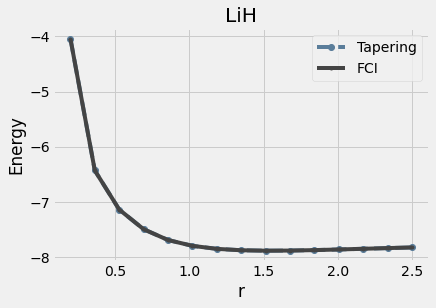

In [6]:
from openfermion.utils import eigenspectrum

prec = 15
qubit_transf = 'jw' # Jordan-Wigner transformations
distance = np.linspace(0.2, 2.5, prec)
energy_fci = obtain_PES('lih', distance, 'sto-3g', 'fci')

energy_tap = np.zeros(prec)
for i in range(prec):
    lih = get_qubit_hamiltonian(mol='lih', geometry=distance[i], basis='sto3g', qubit_transf=qubit_transf)
    h = taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf)
    energy_tap[i] = eigenspectrum(h)[0]
    
#%matplotlib notebook
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')


plt.plot(distance, energy_tap, color='#5a7d9a', linestyle='--', marker='o', label='Tapering')
plt.plot(distance, energy_fci, color='#444444', linestyle='-', marker='.', label='FCI')


plt.xlabel('r')
plt.ylabel('Energy')
plt.title('LiH')

plt.legend()
plt.grid(True)

# H$_4$

In [8]:
prec = 15
qubit_transf = 'jw' # Jordan-Wigner transformations
angles = np.linspace(85, 95, prec)
energy_fci = obtain_PES('h4', angles, 'sto-3g', 'fci')

energy_tap = np.zeros(prec)
for i in range(prec):
    h4 = get_qubit_hamiltonian(mol='h4', geometry=angles[i], basis='sto3g', qubit_transf=qubit_transf)
    h = taper_hamiltonian(h4, n_spin_orbitals=8, n_electrons=4, qubit_transf=qubit_transf)
    energy_tap[i] = eigenspectrum(h)[0]

E = -1.986726115111665 Eh
E = -1.9825409898098094 Eh
E = -1.9788022498350148 Eh
E = -1.9755879194306951 Eh
E = -1.9729780150314484 Eh
E = -1.9710482558385762 Eh
E = -1.9698619510159325 Eh
E = -1.9694615253790553 Eh
E = -1.9698619510159263 Eh
E = -1.9710482558385727 Eh
E = -1.9729780150314502 Eh
E = -1.9755879194306933 Eh
E = -1.978802249835021 Eh
E = -1.9825409898098094 Eh
E = -1.9867261151116788 Eh


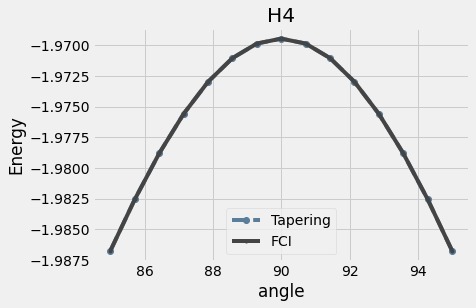

In [9]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')


plt.plot(angles, energy_tap, color='#5a7d9a', linestyle='--', marker='o', label='Tapering')
plt.plot(angles, energy_fci, color='#444444', linestyle='-', marker='.', label='FCI')


plt.xlabel('angle')
plt.ylabel('Energy')
plt.title('H4')

plt.legend()
plt.grid(True)